Universidade Federal do Rio Grande do Sul (UFRGS)   
Programa de Pós-Graduação em Engenharia Civil (PPGEC)   

# PEC00144: Experimental Methods in Civil Engineering

### Using ``scipy.stats.rv_continuous()`` to analize or simulate RV samples   

---
_Prof. Marcelo M. Rocha, Dr.techn._ [(ORCID)](https://orcid.org/0000-0001-5640-1020)  
_Porto Alegre, RS, Brazil_ 


In [1]:
# Importing Python modules required for this notebook
# (this cell must be executed with "shift+enter" before any other Python cell)

import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt


### 1. Predefined random variables

There are many (_dozens of_) predefined continuous RV distribuitions in ``scipy.stats``. 
For instance, the following are the most useful in our context:

1. ``st.uniform(a, b)``: uniform distribuition between $a$ and $b$ limits.
2. ``st.norm(μ, σ)``: normal (Gaussian) distribution with mean $\mu$ and standard 
deviation $\sigma$.
3. ``st.weibull_min(β, L, S)``:  Weibull assimptotic distribution of minima with 
shape $\beta$, location parameter $L$ and scale parameter $S$.

Below is an example how to define RV's with these distributions and plot the
respective probability densities:

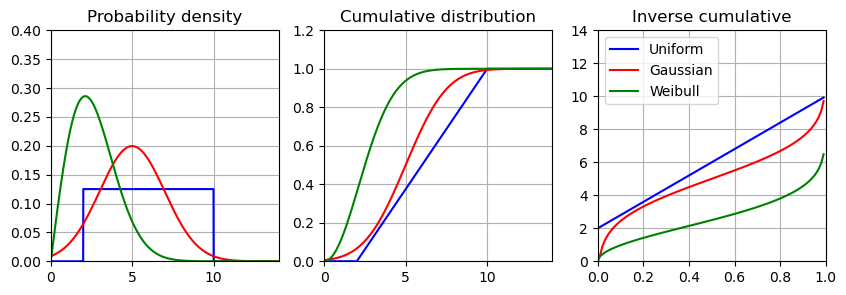

In [2]:
X  = np.linspace(0,14,1400)

U   = st.uniform(2,8)           # define uniform between 2 and 8
Z   = st.norm(5,2)              # define Gaussian with mean 5 and deviation 2
W   = st.weibull_min(2,0,3)     # define Weibull with shape 2, loc 0 and scale 3

f1  = plt.figure(1, figsize=(10,3))

f1s = plt.subplot(1,3,1)
f1a = plt.plot(X, U.pdf(X),'b')
f1b = plt.plot(X, Z.pdf(X),'r')
f1c = plt.plot(X, W.pdf(X),'g')
plt.axis([0, 14, 0, 0.4])
plt.title('Probability density')
plt.grid(True)

f1s = plt.subplot(1,3,2)
f1a = plt.plot(X, U.cdf(X),'b')
f1b = plt.plot(X, Z.cdf(X),'r')
f1c = plt.plot(X, W.cdf(X),'g')
plt.axis([0, 14, 0, 1.2])
plt.title('Cumulative distribution')
plt.grid(True)

f1s = plt.subplot(1,3,3)
f1a = plt.plot(X, U.ppf(X),'b')
f1b = plt.plot(X, Z.ppf(X),'r')
f1c = plt.plot(X, W.ppf(X),'g')
plt.axis([0, 1, 0, 14])
plt.title('Inverse cumulative')
plt.legend(('Uniform','Gaussian','Weibull'))
plt.grid(True)


### 2. Calculation of statistical properties

The estimation of statistical moments are straightforward and can be calculated
in some alternative ways. Below is a method for calculating the most basic properties:

In [3]:
momU = U.stats(moments='mvks')
print('Statistics for defined uniform RV')
print('---------------------------------')
print('Mean value is:             {0:6.3f}'.format(momU[0]))
print('Variance is:               {0:6.3f}'.format(momU[1]))
print('Kurtosis coefficient is:   {0:6.3f}'.format(momU[2]))
print('Skewness coefficient is:   {0:6.3f}'.format(momU[3]),'\n')

momZ = Z.stats(moments='mvks')
print('Statistics for defined normal  RV')
print('---------------------------------')
print('Mean value is:             {0:6.3f}'.format(momZ[0]))
print('Variance is:               {0:6.3f}'.format(momZ[1]))
print('Kurtosis coefficient is:   {0:6.3f}'.format(momZ[2]))
print('Skewness coefficient is:   {0:6.3f}'.format(momZ[3]),'\n')

momW = W.stats(moments='mvks')
print('Statistics for defined Weibull RV')
print('---------------------------------')
print('Mean value is:             {0:6.3f}'.format(momW[0]))
print('Variance is:               {0:6.3f}'.format(momW[1]))
print('Kurtosis coefficient is:   {0:6.3f}'.format(momW[2]))
print('Skewness coefficient is:   {0:6.3f}'.format(momW[3]))

Statistics for defined uniform RV
---------------------------------
Mean value is:              6.000
Variance is:                5.333
Kurtosis coefficient is:    0.000
Skewness coefficient is:   -1.200 

Statistics for defined normal  RV
---------------------------------
Mean value is:              5.000
Variance is:                4.000
Kurtosis coefficient is:    0.000
Skewness coefficient is:    0.000 

Statistics for defined Weibull RV
---------------------------------
Mean value is:              2.659
Variance is:                1.931
Kurtosis coefficient is:    0.631
Skewness coefficient is:    0.245


### 3. Custom definition of random variables

The module also allow us to define our own custom RV distributions, by inheriting 
from  class ``rv_continuous`` and programming either the probability density function 
(method ``_pdf(x)``) or the cumulative distribution function (method ``_cdf(x)``).
It is important, however, that these functions are defined to be normalized (integral
from _pdf_ must be one).

Below is an example on how to implement this new distribution:

In [ ]:
class myRV_gen(st. rv_continuous):
    """
    The parameters are:
    - loc   = lb
    - scale = ub-lb
    
    ... so we can normalize the function betwen 0 and 1.
    """

    def _pdf(self, x):
        # lb, ub = 0, 1
        return 2*x
    
    def _fitstart(self, data):
        return np.min(data), np.max(data)
    
# We must initialize the class here, outside

myRV = myRV_gen(name='myRV', a=0, b=1)


Once the custom distribution is defined, we may instantiate a RV from it. Further methods
available for predefined distributions will automatically apply:

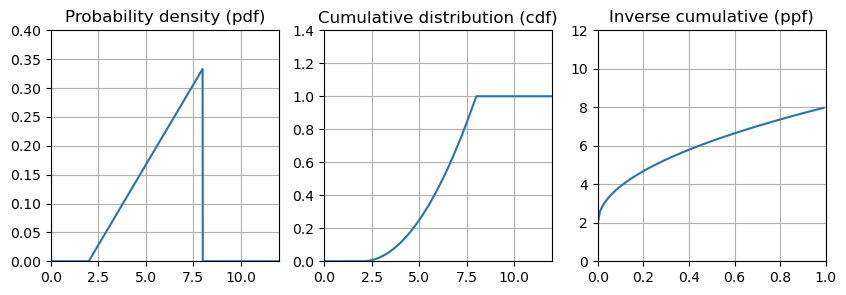

In [5]:
RV  =  myRV(loc=2, scale=6)

f4  =  plt.figure(4, figsize=(10,3))

plt.subplot(1,3,1)
f4a =  plt.plot(X, RV.pdf(X))   # probability density
plt.axis([0, 12, 0, 0.4])
plt.title('Probability density (pdf)')
plt.grid(True)

plt.subplot(1,3,2)
f4b =  plt.plot(X, RV.cdf(X))   # cumulative distribution
plt.axis([0, 12, 0, 1.4])
plt.title('Cumulative distribution (cdf)')
plt.grid(True)

plt.subplot(1,3,3)
f4b =  plt.plot(X, RV.ppf(X))   # inverse cumulative
plt.axis([0, 1, 0, 12])
plt.title('Inverse cumulative (ppf)')
plt.grid(True)


In [6]:
momRV = RV.stats(moments='mvks')

print('Statistics for custom defined  RV')
print('---------------------------------')
print('Mean value is:             {0:6.3f}'.format(momRV[0]))
print('Variance:                  {0:6.3f}'.format(momRV[1]))
print('Kurtosis coefficient is:   {0:6.3f}'.format(momRV[2]))
print('Skewness coefficient is:   {0:6.3f}'.format(momRV[3]))


Statistics for custom defined  RV
---------------------------------
Mean value is:              6.000
Variance:                   2.000
Kurtosis coefficient is:   -0.566
Skewness coefficient is:   -0.600


### 4. Simulation of random variables

To simulate an array with dimensions ``shape`` of samples from a given distribution, 
the method ``rv_continuous.rvs(shape)`` can be used, as shown below. 

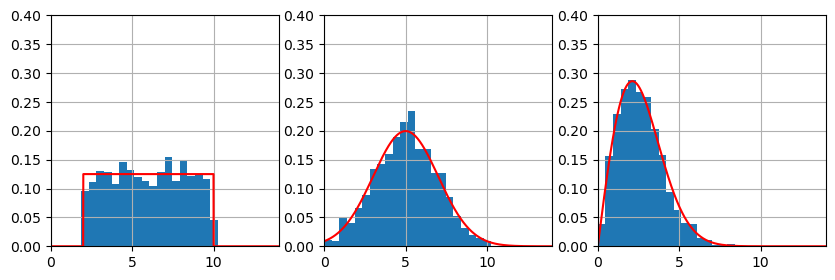

In [7]:
Ui = U.rvs(1000)
Zi = Z.rvs(1000)
Wi = W.rvs(1000)

plt.figure(5, figsize=(10,3))

plt.subplot(1,3,1)
f5a = plt.hist(Ui, bins=30, range=(0,14), density=True)
f5b = plt.plot(X, U.pdf(X), 'r')
plt.axis([0, 14, 0, 0.4])
plt.grid(True)

plt.subplot(1,3,2)
f6a = plt.hist(Zi, bins=30, range=(0,14), density=True)
f6b = plt.plot(X, Z.pdf(X), 'r')
plt.axis([0, 14, 0, 0.4])
plt.grid(True)

plt.subplot(1,3,3)
f7a = plt.hist(Wi, bins=30, range=(0,14), density=True)
f7b = plt.plot(X, W.pdf(X), 'r')
plt.axis([0, 14, 0, 0.4])
plt.grid(True)


The same can be accomplished also for custom distributions:

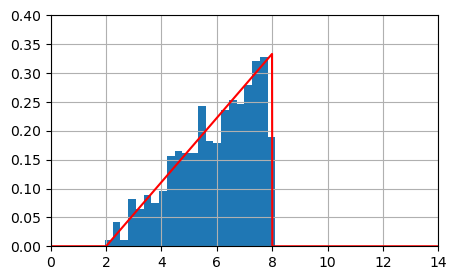

In [8]:
RVi = RV.rvs(size=1000)  # size is explicit to avoid ambiguity

plt.figure(6, figsize=(5,3))

f6a = plt.hist(RVi, bins=50, range=(0,14), density=True)
f6b = plt.plot(X, RV.pdf(X), 'r')
plt.axis([0, 14, 0, 0.4])
plt.grid(True)


### 5. Fitting probability distributions to data

From a given array of samples, ``data``, from a given distribution, the method 
``rv_continuous.fit(data)`` provides the estimation of parameters that 
should be used along with the constructor method.

For the three distributions of previous examples:

In [9]:
parU = st.uniform.fit(Ui)
print('Uniform distribution')
print('--------------------')
print('Lower bound:        {0:6.3f}'.format(parU[0]))
print('Upper bound:        {0:6.3f}'.format(parU[1]),'\n')

parZ = st.norm.fit(Zi)
print('Normal  distribution')
print('--------------------')
print('Mean value:         {0:6.3f}'.format(parZ[0]))
print('Standard deviation: {0:6.3f}'.format(parZ[1]),'\n')

parW = st.weibull_min.fit(Wi)
print('Weibull distribution')
print('--------------------')
print('Shape parameter:    {0:6.3f}'.format(parW[0]))
print('Location parameter: {0:6.3f}'.format(parW[1]))
print('Scale parameter:    {0:6.3f}'.format(parW[2]))


Uniform distribution
--------------------
Lower bound:         2.012
Upper bound:         7.987 

Normal  distribution
--------------------
Mean value:          5.003
Standard deviation:  1.930 

Weibull distribution
--------------------
Shape parameter:     1.957
Location parameter:  0.060
Scale parameter:     2.906


The observed differences from the initial definitions  are due to the 
inherent statistical errors in the parameters estimation.
The fitting method is also available for our custom distribution:

In [10]:
parRV = myRV.fit(RVi)

print('Custom distribution')
print('-------------------')
print('Loc      (lb): {0:6.3f}'.format(parRV[0]))
print('Scale (ub-lb): {0:6.3f}'.format(parRV[1]))


Custom distribution
-------------------
Loc      (lb):  1.926
Scale (ub-lb):  6.068
